In [1]:
#Import Library
import numpy as np
import pandas as pd

#visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.cluster import KMeans

In [2]:
dompet = pd.read_csv("C:/Users/Asus/Downloads/credit_data.csv")

In [3]:
dompet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
dompet.shape #untuk melihat bentuk data

(1000, 11)

In [5]:
dompet.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
#missing value check
def missingdata(dompet):
    total = dompet.isnull().sum().sort_values(ascending = False)
    percent = (dompet.isnull().sum()/dompet.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Persentase'])
    return ms

In [7]:
missingdata(dompet) #pada data terdapat missing value

,Total,Persentase
Checking account,394,39.4
Saving accounts,183,18.3
Unnamed: 0,0,0.0
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0


In [8]:
dom=dompet.drop_duplicates()
dom

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [9]:
dompet.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [10]:
dompet.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [11]:
#Categorical variable
dompet_cat = [col for col in dompet.columns if dompet[col].dtypes == 'O']

for col in dompet_cat:
    print(dompet[col].value_counts(), "\n\n")

male      690
female    310
Name: Sex, dtype: int64 


own     713
rent    179
free    108
Name: Housing, dtype: int64 


little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64 


little      274
moderate    269
rich         63
Name: Checking account, dtype: int64 


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64 


good    700
bad     300
Name: Risk, dtype: int64 




In [12]:
dompet = dompet.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [13]:
dompet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


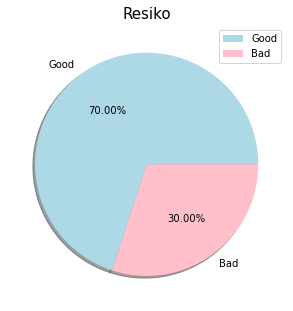

In [14]:
#Risk Pie Chart

labels = ['Good', 'Bad']
size = dompet['Risk'].value_counts()
colors = ['lightblue', 'pink']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 7)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Resiko', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

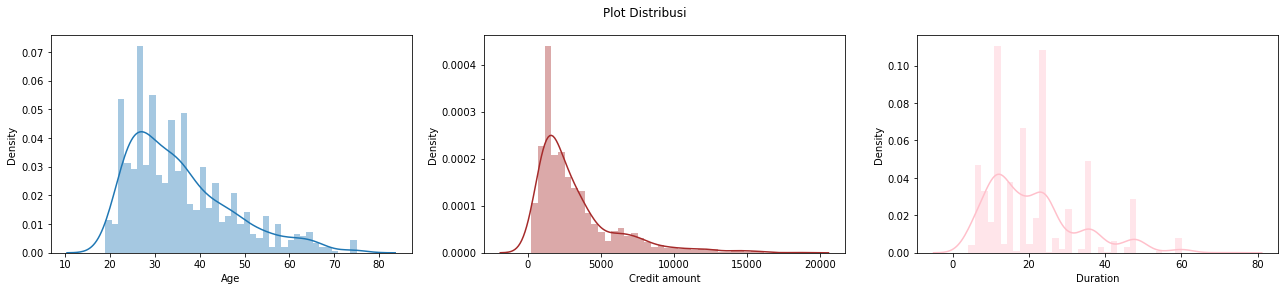

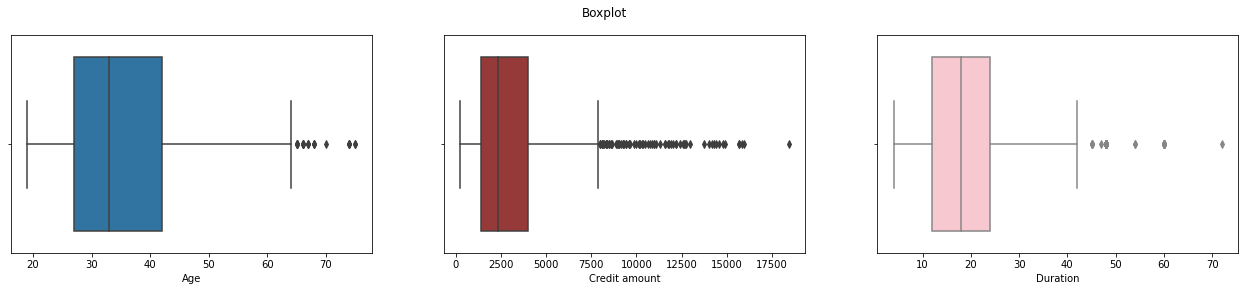

In [15]:
#Analisis Univariate untuk Variabel Numerik

fig, ax = plt.subplots(1,3,figsize=(22,4))
plt.suptitle('Plot Distribusi')
sns.distplot(dompet['Age'], bins=40, ax=ax[0]);
sns.distplot(dompet['Credit amount'], bins=40, ax=ax[1], color='brown');
sns.distplot(dompet['Duration'], bins=40, ax=ax[2], color='pink');

fig, ax = plt.subplots(1,3,figsize=(22,4))
plt.suptitle('Boxplot')
sns.boxplot(dompet['Age'], ax=ax[0]);
sns.boxplot(dompet['Credit amount'], ax=ax[1], color='brown');
sns.boxplot(dompet['Duration'], ax=ax[2], color='pink');

In [16]:
#Bivariate analysis categorical variable
def annot_num(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


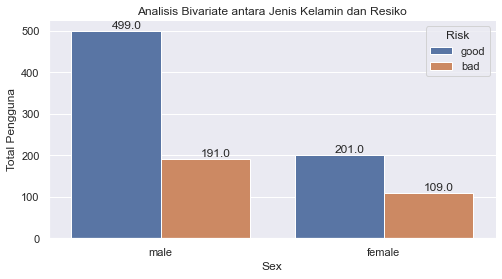

In [17]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
ax = sns.countplot('Sex',hue='Risk', data = dompet)
plt.ylabel('Total Pengguna')
annot_num(ax,0.18,5)
plt.title("Analisis Bivariate antara Jenis Kelamin dan Resiko")

plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


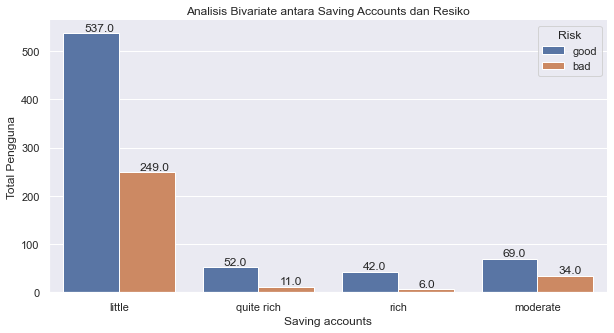

In [18]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5))
ax = sns.countplot('Saving accounts',hue='Risk', data = dompet)
plt.ylabel('Total Pengguna')
annot_num(ax,0.15,5)
plt.title("Analisis Bivariate antara Saving Accounts dan Resiko")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


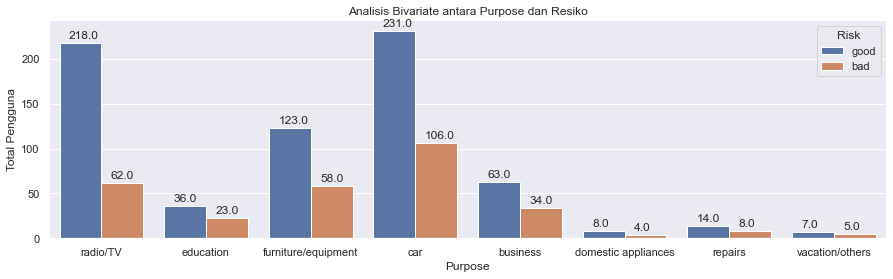

In [19]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,4))
ax = sns.countplot('Purpose',hue='Risk', data = dompet)
plt.ylabel('Total Pengguna')
annot_num(ax,0.09,5)
plt.title("Analisis Bivariate antara Purpose dan Resiko")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


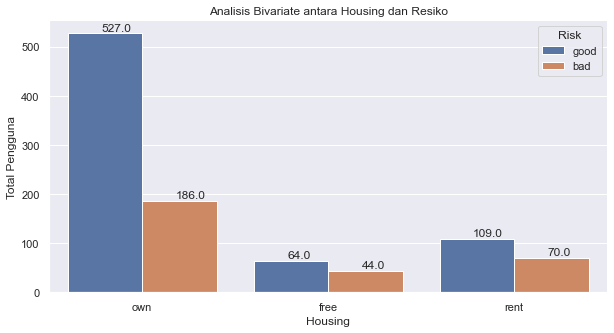

In [20]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5))
ax = sns.countplot('Housing',hue='Risk', data = dompet)
plt.ylabel('Total Pengguna')
annot_num(ax,0.18,5)
plt.title("Analisis Bivariate antara Housing dan Resiko")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


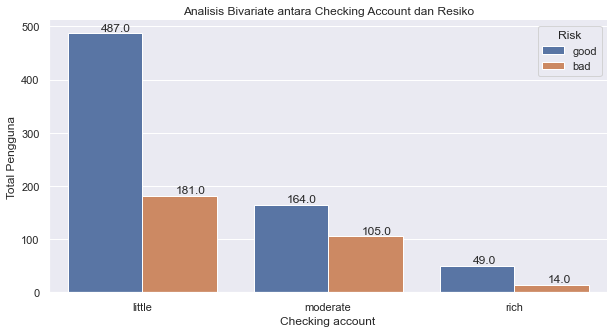

In [21]:
plt.figure(figsize=(10,5))
ax = sns.countplot('Checking account',hue='Risk', data = dompet)
plt.ylabel('Total Pengguna')
annot_num(ax,0.18,5)
plt.title("Analisis Bivariate antara Checking Account dan Resiko")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


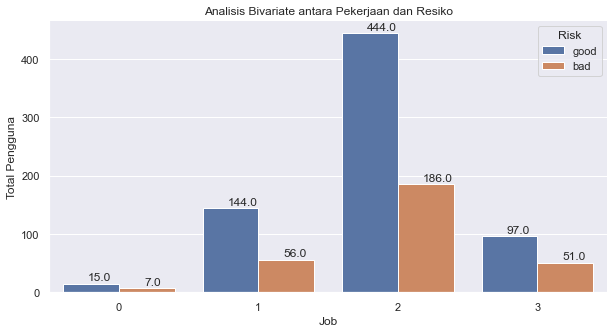

In [22]:
plt.figure(figsize=(10,5))
ax = sns.countplot('Job',hue='Risk', data = dompet)
plt.ylabel('Total Pengguna')
annot_num(ax,0.18,5)
plt.title("Analisis Bivariate antara Pekerjaan dan Resiko")
plt.show()

<ipython-input-23-c705fa7c21f4>:2: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)


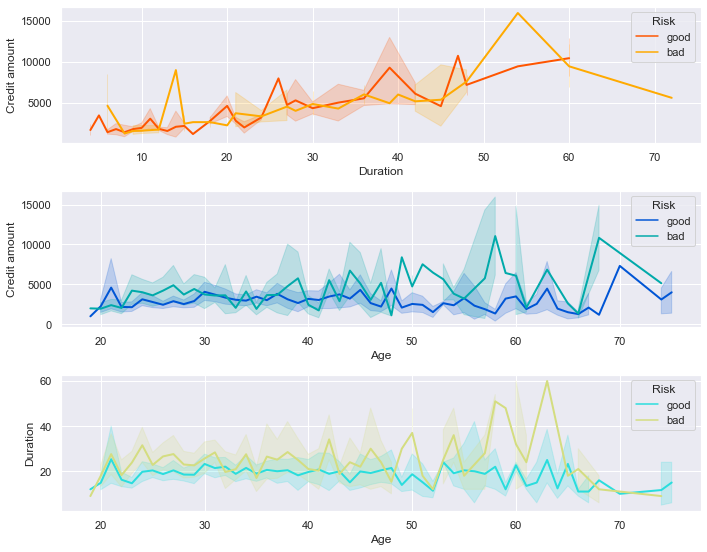

In [23]:
fig, ax = plt.subplots(3,1,figsize=(10,8))
plt.tight_layout(2)

sns.lineplot(data=dompet, x='Duration', y='Credit amount', hue='Risk', lw=2, ax=ax[0], palette='autumn');
sns.lineplot(data=dompet, x='Age', y='Credit amount', hue='Risk', lw=2, ax=ax[1], palette='winter');
sns.lineplot(data=dompet, x='Age', y='Duration', hue='Risk', lw=2, ax=ax[2], palette='rainbow');

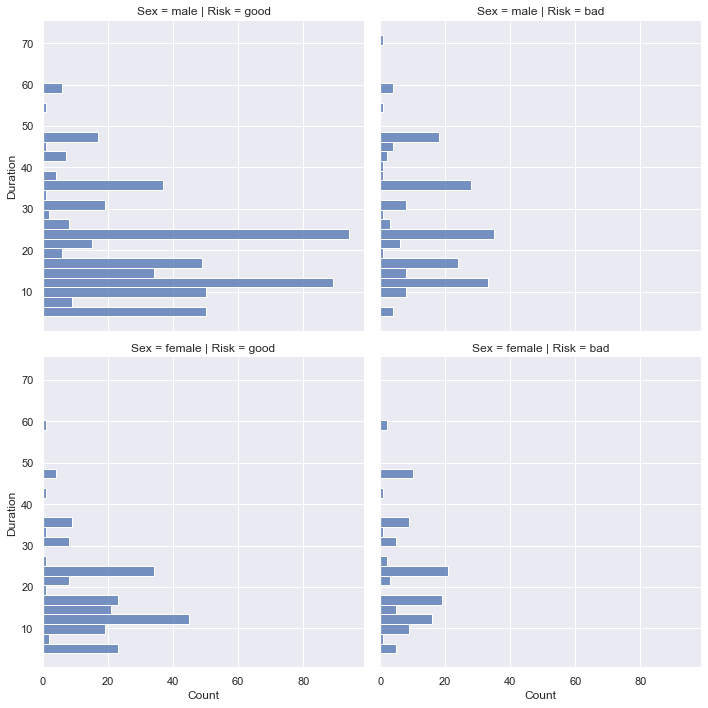

In [24]:
sns.displot(data=dompet, row='Sex', y='Duration', col='Risk')
plt.show()

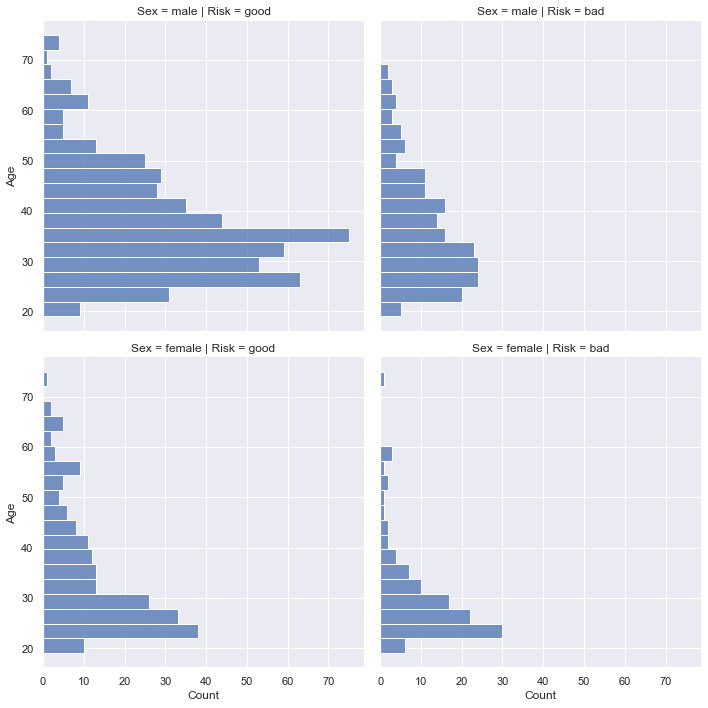

In [25]:
sns.displot(data=dompet, row='Sex', y='Age', col='Risk')
plt.show()

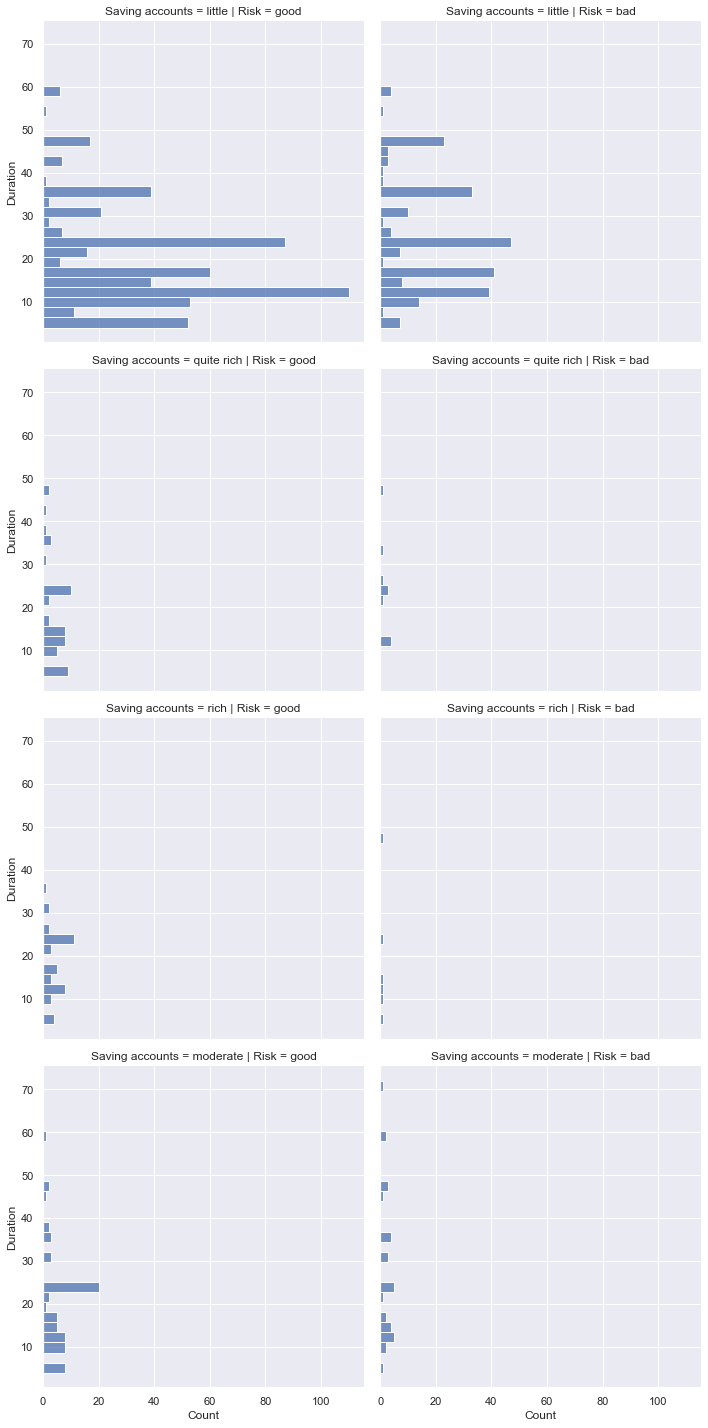

In [26]:
sns.displot(data=dompet, row='Saving accounts', y='Duration', col='Risk')
plt.show()

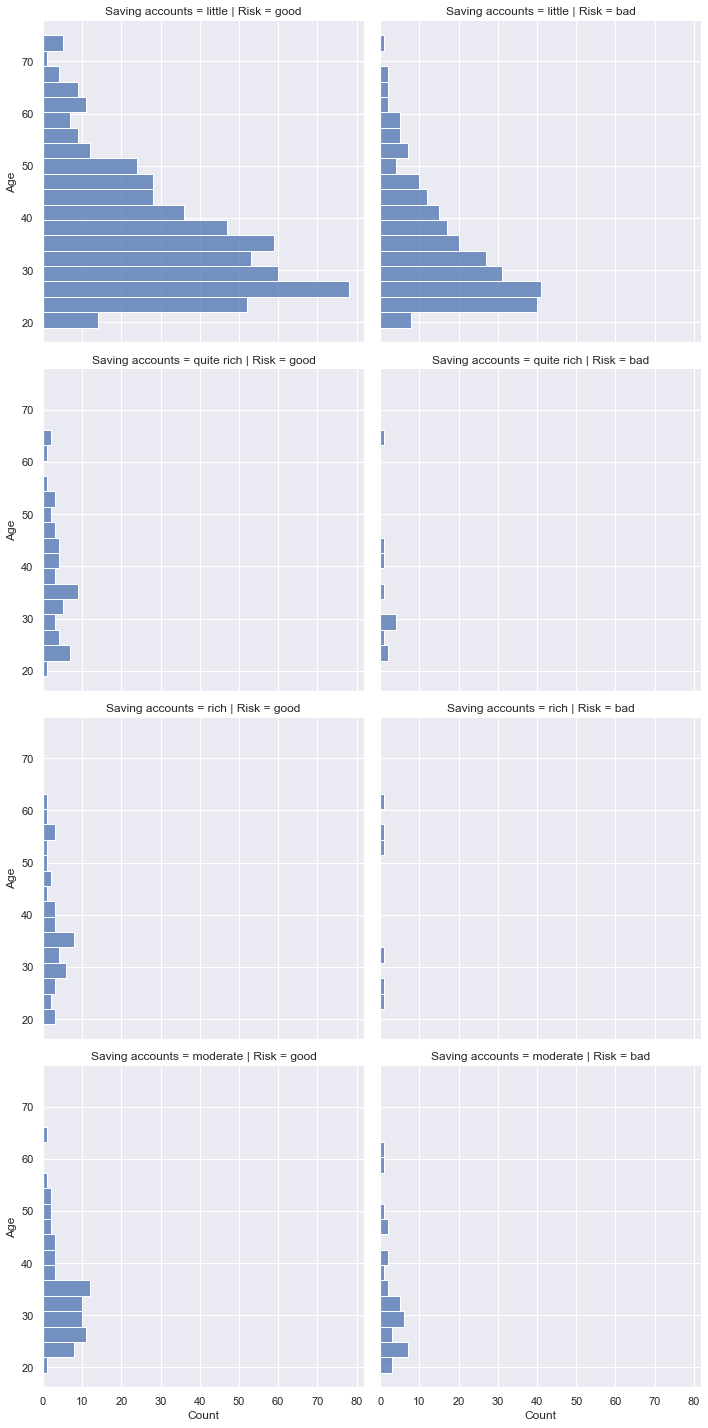

In [27]:
sns.displot(data=dompet, row='Saving accounts', y='Age', col='Risk')
plt.show()

In [28]:
dompet.drop("Unnamed: 0",axis=1,inplace=True) #hapus variabel unnamed untuk persiapan proses data

In [29]:
dompet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [30]:
dompet.shape

(1000, 10)

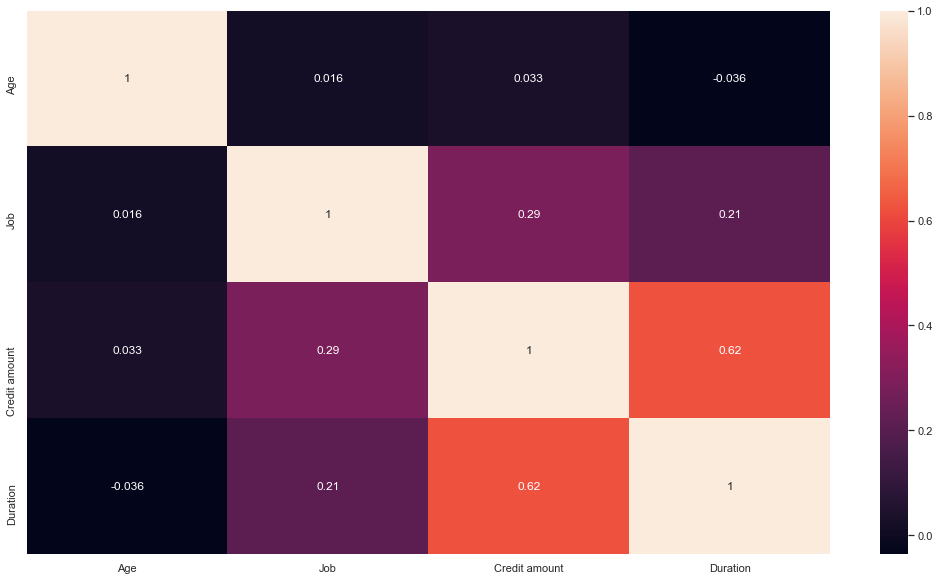

In [31]:
corr = dompet.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

In [32]:
categorical_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

In [33]:
#labelencode the categorical features
for i, cat in enumerate(categorical_features):
    dompet[cat] = LabelEncoder().fit_transform(dompet[cat])

In [34]:
dompet.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


In [35]:
norm_dompet = dompet[['Age', 'Duration', 'Credit amount']]
norm_dompet = np.log(norm_dompet)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

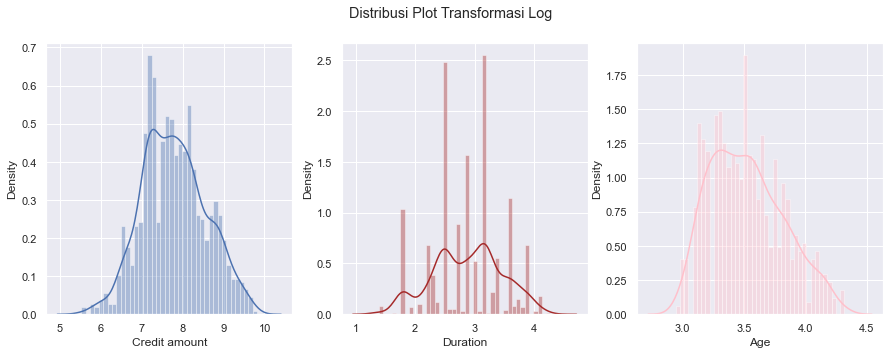

In [36]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
plt.suptitle('Distribusi Plot Transformasi Log')
sns.distplot(norm_dompet['Age'], bins=40, ax=ax[2], color='pink');
sns.distplot(norm_dompet['Credit amount'], bins=40, ax=ax[0]);
sns.distplot(norm_dompet['Duration'], bins=40, ax=ax[1], color='brown');

In [37]:
scaler = StandardScaler()
dompet_scaled = scaler.fit_transform(norm_dompet)

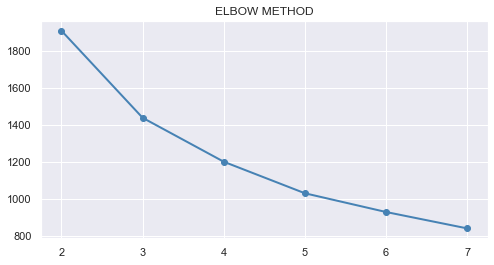

In [38]:
inertias = []

for i in range(2,8):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(dompet_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.title('ELBOW METHOD')
plt.plot(np.arange(2,8),inertias, marker='o', lw=2, color='steelblue');

No handles with labels found to put in legend.


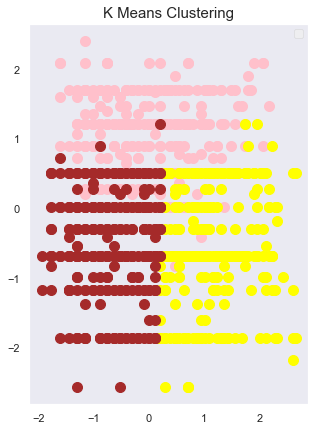

In [39]:
#Customer Segmentation dengan K-Means
kmeans= KMeans(n_clusters = 3, random_state = 0)


#Prediksi Cluster tiap sampel
y_means = kmeans.fit_predict(dompet_scaled)

plt.scatter(dompet_scaled[y_means == 0, 0], dompet_scaled[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(dompet_scaled[y_means == 1, 0], dompet_scaled[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(dompet_scaled[y_means == 2, 0], dompet_scaled[y_means == 2, 1], s = 100, c = 'brown')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 15)
plt.legend()
plt.grid()
plt.show()


In [40]:
norm_dompet['Cluster'] = pd.DataFrame(y_means, columns=['cluster'] )
print('Jumlah tiap klaster= \n', norm_dompet['Cluster'].value_counts())

Jumlah tiap klaster= 
 0    375
2    364
1    261
Name: Cluster, dtype: int64


In [41]:
#Prediksi model
dompet_scaled = pd.DataFrame(dompet_scaled, columns=['Age', 'Duration', 'Credit Amount'])
dompet_kat = dompet[categorical_features]

data = pd.concat([dompet_kat, dompet_scaled], axis=1)

In [42]:
data.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk,Age,Duration,Credit Amount
0,1,2,1,0,0,5,1,2.271006,-1.864869,-0.933901
1,0,2,1,0,1,5,0,-1.446152,1.708369,1.163046
2,1,1,1,0,0,3,1,1.226696,-0.673790,-0.181559
3,1,2,0,0,0,4,1,0.942455,1.478913,1.525148
4,1,2,0,0,0,1,0,1.488620,0.517289,0.904743


In [43]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [44]:
X = data.drop('Risk', axis=1)
y = data['Risk']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_pred_knn, y_test))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


0.645
[[ 16  42]
 [ 29 113]]
              precision    recall  f1-score   support

           0       0.36      0.28      0.31        58
           1       0.73      0.80      0.76       142

    accuracy                           0.65       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.62      0.65      0.63       200



In [47]:
nb = GaussianNB().fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_pred_nb, y_test))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.71
[[ 22  36]
 [ 22 120]]
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        58
           1       0.77      0.85      0.81       142

    accuracy                           0.71       200
   macro avg       0.63      0.61      0.62       200
weighted avg       0.69      0.71      0.70       200



In [48]:
xgb = XGBClassifier(eta=0.19, max_depth=8, subsample=0.8, colsample_bytree=1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_pred_xgb, y_test))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

0.685
[[ 21  37]
 [ 26 116]]
              precision    recall  f1-score   support

           0       0.45      0.36      0.40        58
           1       0.76      0.82      0.79       142

    accuracy                           0.69       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.67      0.69      0.67       200



                                   fpr                             tpr  \
models                                                                   
XGB     [0.0, 0.6379310344827587, 1.0]  [0.0, 0.8169014084507042, 1.0]   
KNN     [0.0, 0.7241379310344828, 1.0]   [0.0, 0.795774647887324, 1.0]   

             auc  
models            
XGB     0.589485  
KNN     0.535818  


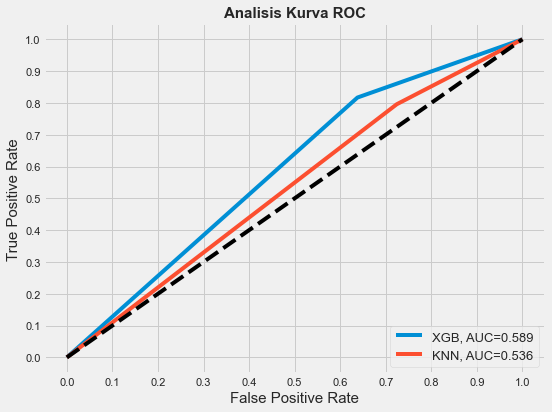

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'XGB': y_pred_xgb, 'KNN':y_pred_knn}

for key in predictions:
    fpr, tpr, _ = roc_curve(y_test, predictions[key])
    auc = roc_auc_score(y_test, predictions[key])
    
    results_table = results_table.append({'models': key,
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('Analisis Kurva ROC', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()

In [51]:
feature_importance = pd.DataFrame()
feature_importance["feature"] = X_train.columns
feature_importance["importance"] = xgb.feature_importances_
feature_importance = feature_importance.sort_values("importance", ascending=False)
feature_importance

,feature,importance
7,Duration,0.136354
3,Saving accounts,0.131254
2,Housing,0.119591
8,Credit Amount,0.108603
1,Job,0.104846
6,Age,0.104594
5,Purpose,0.101765
0,Sex,0.099808
4,Checking account,0.093185
